In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

from tqdm import tqdm


In [ ]:
!wget https://archive.ics.uci.edu/static/public/908/realwaste.zip

--2024-12-11 16:03:22--  https://archive.ics.uci.edu/static/public/908/realwaste.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘realwaste.zip’

realwaste.zip           [              <=>   ] 656.65M  4.15MB/s    in 1m 44s  

2024-12-11 16:05:07 (6.30 MB/s) - ‘realwaste.zip’ saved [688545323]



In [ ]:
# Upload your zip file to Colab
!unzip /content/realwaste.zip -d /content/dataset


Archive:  /content/realwaste.zip
797f4fca27a3a85e4c27131cdb7d9a9a5d72c494
   creating: /content/dataset/realwaste-main/
  inflating: /content/dataset/realwaste-main/README.md  
   creating: /content/dataset/realwaste-main/RealWaste/
   creating: /content/dataset/realwaste-main/RealWaste/Cardboard/
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_1.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_10.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_100.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_101.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_102.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_103.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_104.jpg  
  inflating: /content/dataset/realwaste-main/RealWaste/Cardboard/Cardboard_105.jpg  
  inflating: /content/da

In [ ]:
!apt-get install tree

!tree /content/dataset

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (53.7 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/dataset
└── realwaste-main
    ├── README.md
    └── RealWaste
        ├── Cardboard
        │   ├── Cardboard_100.jpg
        │   ├── Cardboard_101.jpg
        │   ├── Cardboard_102.jpg
        │   ├── Cardboard_103.jpg
        │   ├── Cardboard_104.jpg
        │   ├── Cardboa

Displaying images from class: Cardboard


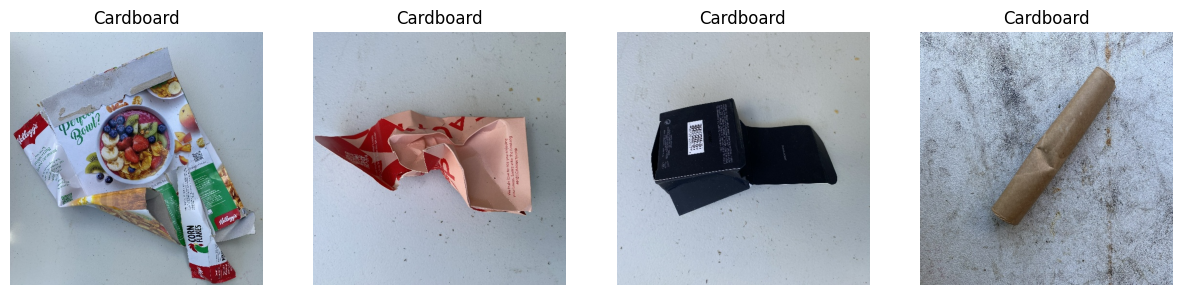

Displaying images from class: Food Organics


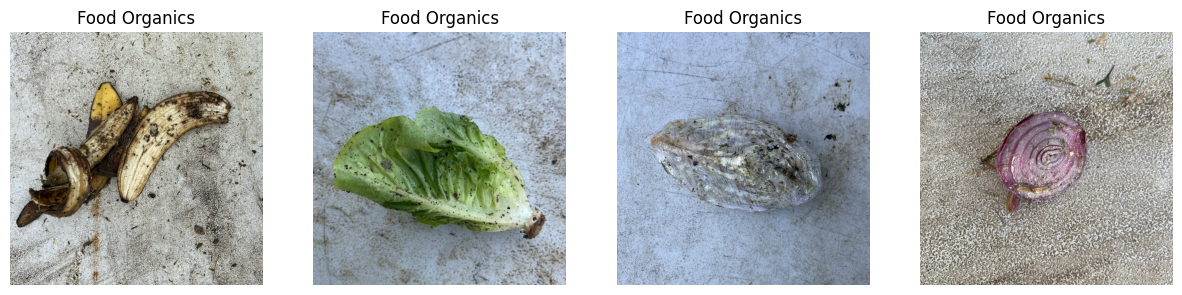

Displaying images from class: Glass


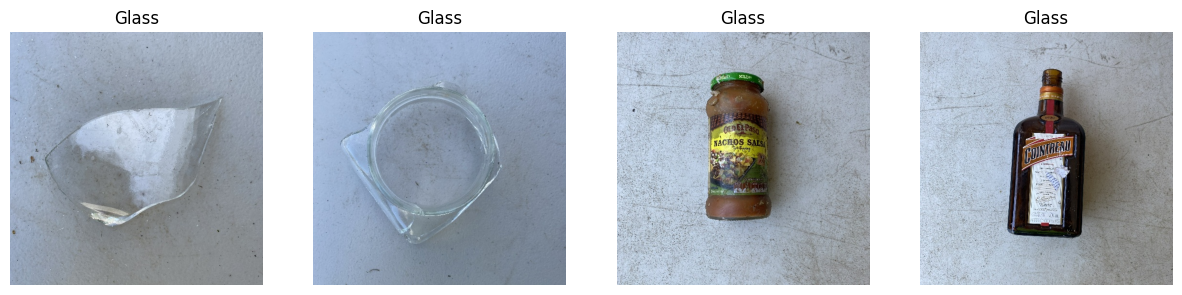

Displaying images from class: Metal


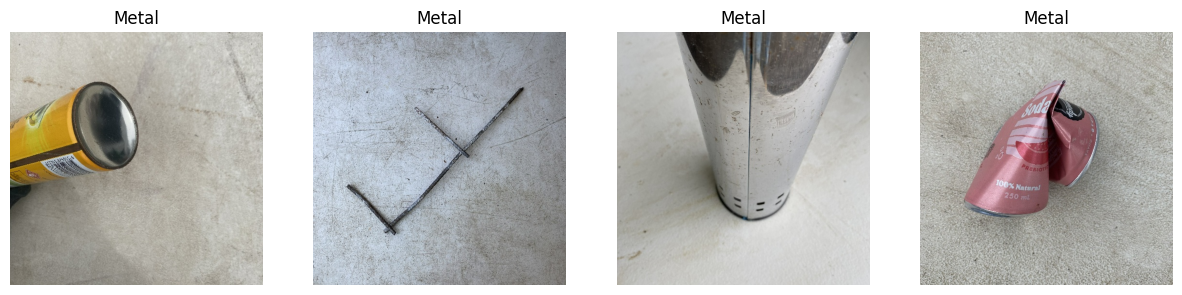

Displaying images from class: Miscellaneous Trash


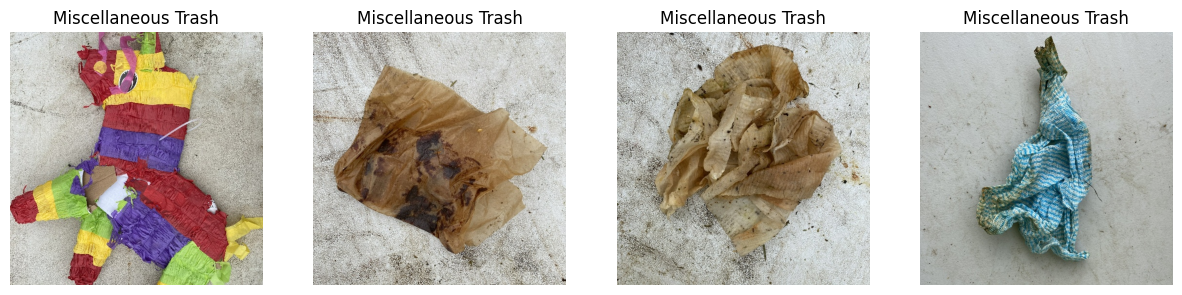

Displaying images from class: Paper


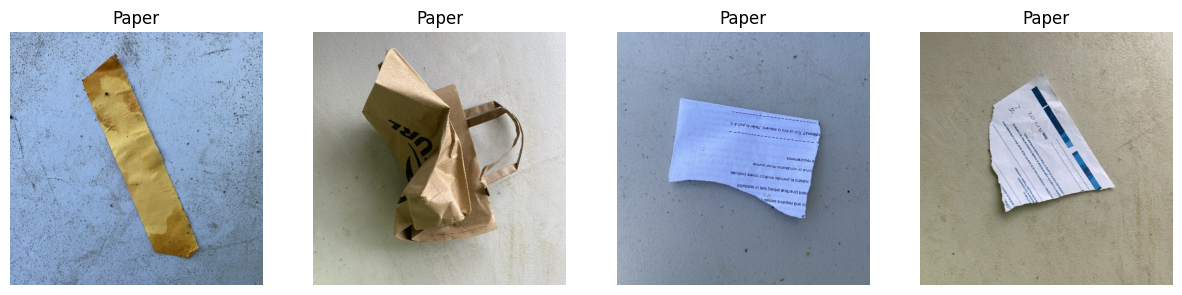

Displaying images from class: Plastic


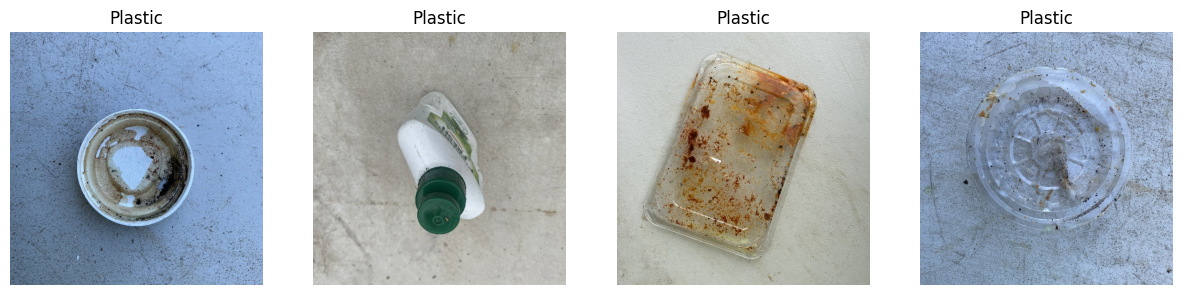

Displaying images from class: Textile Trash


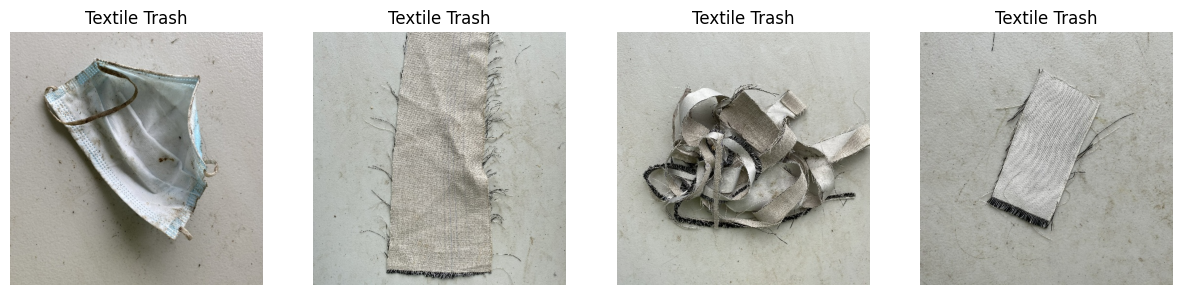

Displaying images from class: Vegetation


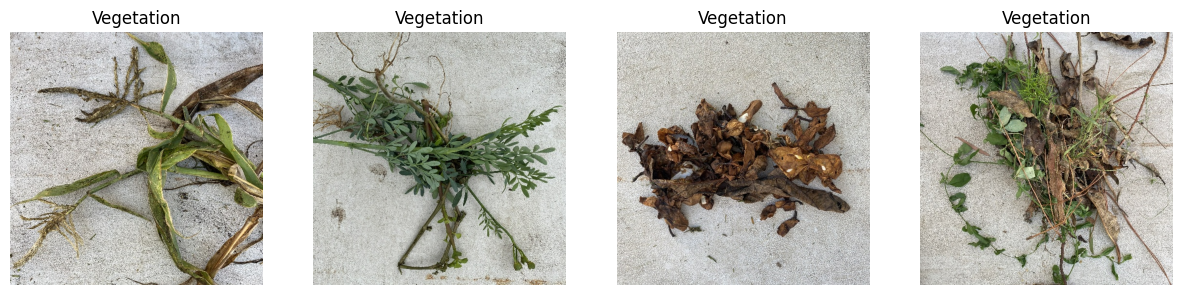

In [ ]:
# Set the base directory containing class folders
base_dir = "/content/dataset/realwaste-main/RealWaste"

# Loop through each class folder
for class_name in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Displaying images from class: {class_name}")

        # Get 4 random images from the class folder
        images = random.sample(os.listdir(class_path), 4)

        # Plot the images
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        for i, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            image = imread(img_path)
            axes[i].imshow(image)
            axes[i].axis('off')
            axes[i].set_title(class_name)
        plt.show()


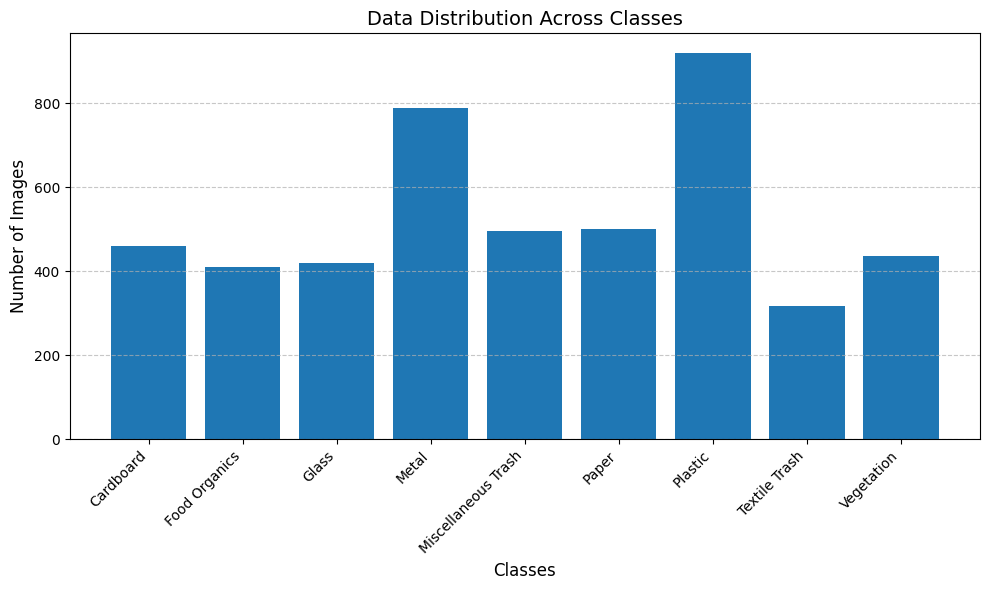

In [ ]:
# Dictionary to store class names and image counts
class_counts = {}

# Count the number of images in each class folder
for class_name in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

# Plotting the data distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Data Distribution Across Classes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:

# Pick one random image from a random class
class_name = random.choice(os.listdir(base_dir))
class_path = os.path.join(base_dir, class_name)

if os.path.isdir(class_path):
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    print(f"Selected Image: {image_path}")

    # Load the image using Pillow
    with Image.open(image_path) as img:
        # Display characteristics
        width, height = img.size
        mode = img.mode  # Color channels (e.g., RGB, RGBA, L)
        format_ = img.format  # Image format (e.g., JPEG, PNG)

        print(f"Image Format: {format_}")
        print(f"Image Size: {width} x {height}")
        print(f"Color Channels: {mode}")

        # Display the image
        img.show()


Selected Image: /content/dataset/realwaste-main/RealWaste/Miscellaneous Trash/Miscellaneous Trash_429.jpg
Image Format: JPEG
Image Size: 524 x 524
Color Channels: RGB


In [ ]:

# Initialize accumulators for mean and standard deviation
pixel_sum = np.zeros(3)  # For 3 channels (R, G, B)
pixel_sq_sum = np.zeros(3)
num_pixels = 0

# Define transformation for resizing and converting to tensor
transform_for_stats = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor()          # Convert to tensor
])

# Base directory of the dataset
base_dir = "/content/dataset/realwaste-main/RealWaste"

# Sample images from each class
for class_name in sorted(os.listdir(base_dir)):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Processing class: {class_name}")
        images = random.sample(os.listdir(class_path), int(len(os.listdir(class_path)) * 0.3))

        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            with Image.open(img_path) as img:
                # Apply transformations
                img_tensor = transform_for_stats(img)

                # Accumulate pixel values
                pixel_sum += img_tensor.sum(dim=(1, 2)).numpy()  # Sum over height and width
                pixel_sq_sum += (img_tensor ** 2).sum(dim=(1, 2)).numpy()
                num_pixels += img_tensor.shape[1] * img_tensor.shape[2]  # H * W

# Compute mean and standard deviation
mean = pixel_sum / num_pixels
std = np.sqrt(pixel_sq_sum / num_pixels - mean ** 2)

print(f"Mean (per channel): {mean}")
print(f"Standard Deviation (per channel): {std}")


Processing class: Cardboard
Processing class: Food Organics
Processing class: Glass
Processing class: Metal
Processing class: Miscellaneous Trash
Processing class: Paper
Processing class: Plastic
Processing class: Textile Trash
Processing class: Vegetation
Mean (per channel): [0.59768724 0.61800813 0.63029004]
Standard Deviation (per channel): [0.15915815 0.16068667 0.18420893]


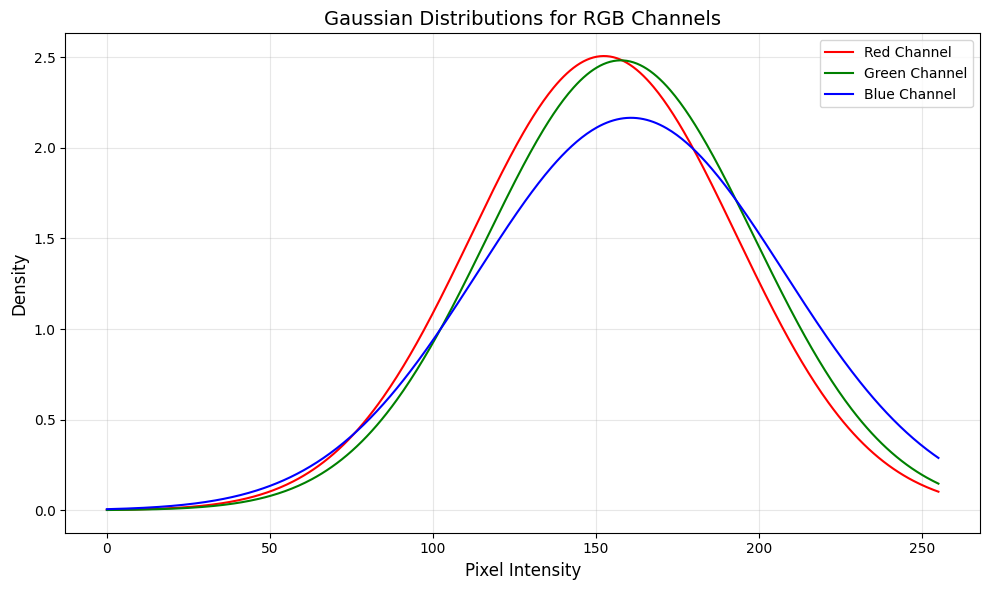

In [ ]:

mean=list(mean)
std=list(std)
colors = ['red', 'green', 'blue']  # Colors for the RGB distributions
labels = ['Red Channel', 'Green Channel', 'Blue Channel']

# Generate x values for the Gaussian distributions
x = np.linspace(0, 255, 500)  # Adjust range if pixel values are normalized

plt.figure(figsize=(10, 6))

# Plot each Gaussian distribution
for mean, std, color, label in zip(mean, std, colors, labels):
    y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean * 255) / (std * 255)) ** 2)
    plt.plot(x, y, color=color, label=label)

# Add plot details
plt.title('Gaussian Distributions for RGB Channels', fontsize=14)
plt.xlabel('Pixel Intensity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:

# Path to the dataset
dataset_path = "/content/dataset/realwaste-main/RealWaste"


# Transformation pipeline: Resize, ToTensor, Normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean, std) # Normalize using calculated mean and std
])

# Load the entire dataset
full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Define split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Compute lengths for each split
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
val_size = int(val_ratio * total_size)
test_size = total_size - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Display split sizes
print(f"Total images: {total_size}")
print(f"Training set: {train_size} images")
print(f"Validation set: {val_size} images")
print(f"Test set: {test_size} images")


Total images: 4752
Training set: 2851 images
Validation set: 950 images
Test set: 951 images


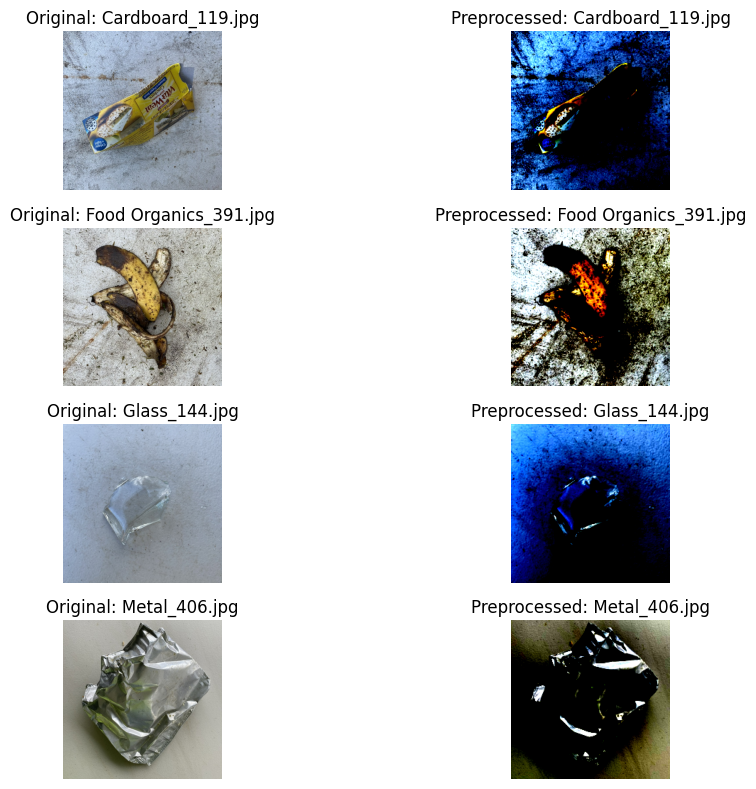

In [ ]:


# Pick 4 random images from the dataset
random_images = []
for class_name in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        random_images.extend(random.sample(
            [os.path.join(class_path, img) for img in os.listdir(class_path)], 1
        ))  # Pick one image from 4 classes
    if len(random_images) == 4:
        break

# Display original and preprocessed images
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(random_images):
    with Image.open(img_path) as img:
        # Original image
        plt.subplot(4, 2, i * 2 + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original: {os.path.basename(img_path)}")

        # Preprocessed image
        preprocessed_img=transform(img)

        plt.subplot(4, 2, i * 2 + 2)
        plt.imshow(preprocessed_img.permute(1, 2, 0).numpy())  # Convert tensor back to image
        plt.axis('off')
        plt.title(f"Preprocessed: {os.path.basename(img_path)}")

plt.tight_layout()
plt.show()


In [ ]:

# Define the CNNClassifier
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()

        # Feature Extraction (Convolutional Layers)
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=1),  # Input: 3x224x224, Output: 64x224x224
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                 # Output: 64x111x111

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # Output: 128x111x111
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 128x55x55

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1), # Output: 256x55x55
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), # Output: 256x55x55
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 256x27x27

            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1), # Output: 512x27x27
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), # Output: 512x27x27
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),                 # Output: 512x13x13

            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), # Output: 512x13x13
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), # Output: 512x13x13
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)                  # Output: 512x6x6
        )

        # Adaptive Average Pooling
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))    # Output: 512x7x7

        # Fully Connected Layers (Classifier)
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)  # Output: num_classes
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)  # Flatten for the fully connected layers
        x = self.classifier(x)
        return x

# Initialize the model
num_classes = len(full_dataset.classes)
model = CNNClassifier(num_classes)

# Print the model structure
print(model)


CNNClassifier(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mod

Epoch 1/20


100%|██████████| 90/90 [00:43<00:00,  2.08it/s]


Train Loss: 2.0042, Train Accuracy: 0.2403
Val Loss: 1.7198, Val Accuracy: 0.3463
Saved Best Model!
Epoch 2/20


100%|██████████| 90/90 [00:40<00:00,  2.23it/s]


Train Loss: 1.6902, Train Accuracy: 0.3648
Val Loss: 1.6447, Val Accuracy: 0.3758
Saved Best Model!
Epoch 3/20


100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


Train Loss: 1.5666, Train Accuracy: 0.4213
Val Loss: 1.4435, Val Accuracy: 0.4705
Saved Best Model!
Epoch 4/20


100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


Train Loss: 1.4175, Train Accuracy: 0.4728
Val Loss: 1.3889, Val Accuracy: 0.4905
Saved Best Model!
Epoch 5/20


100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


Train Loss: 1.3291, Train Accuracy: 0.5170
Val Loss: 1.3722, Val Accuracy: 0.5232
Saved Best Model!
Epoch 6/20


100%|██████████| 90/90 [00:41<00:00,  2.15it/s]


Train Loss: 1.1659, Train Accuracy: 0.5682
Val Loss: 1.1759, Val Accuracy: 0.5663
Saved Best Model!
Epoch 7/20


100%|██████████| 90/90 [00:41<00:00,  2.16it/s]


Train Loss: 1.0479, Train Accuracy: 0.6093
Val Loss: 1.1061, Val Accuracy: 0.6032
Saved Best Model!
Epoch 8/20


100%|██████████| 90/90 [00:41<00:00,  2.16it/s]


Train Loss: 0.9639, Train Accuracy: 0.6461
Val Loss: 1.0394, Val Accuracy: 0.6253
Saved Best Model!
Epoch 9/20


100%|██████████| 90/90 [00:46<00:00,  1.95it/s]


Train Loss: 0.8868, Train Accuracy: 0.6678
Val Loss: 1.0123, Val Accuracy: 0.6358
Saved Best Model!
Epoch 10/20


100%|██████████| 90/90 [00:41<00:00,  2.15it/s]


Train Loss: 0.7888, Train Accuracy: 0.7233
Val Loss: 1.0209, Val Accuracy: 0.6379
Epoch 11/20


100%|██████████| 90/90 [00:41<00:00,  2.16it/s]


Train Loss: 0.7208, Train Accuracy: 0.7394
Val Loss: 0.9639, Val Accuracy: 0.6779
Saved Best Model!
Epoch 12/20


100%|██████████| 90/90 [00:42<00:00,  2.12it/s]


Train Loss: 0.6309, Train Accuracy: 0.7692
Val Loss: 0.9137, Val Accuracy: 0.6632
Saved Best Model!
Epoch 13/20


100%|██████████| 90/90 [00:42<00:00,  2.12it/s]


Train Loss: 0.5658, Train Accuracy: 0.7938
Val Loss: 0.9560, Val Accuracy: 0.6684
Epoch 14/20


100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


Train Loss: 0.4824, Train Accuracy: 0.8243
Val Loss: 1.0254, Val Accuracy: 0.6832
Epoch 15/20


100%|██████████| 90/90 [00:42<00:00,  2.10it/s]


Train Loss: 0.4164, Train Accuracy: 0.8471
Val Loss: 0.9451, Val Accuracy: 0.6905
Epoch 16/20


100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


Train Loss: 0.3221, Train Accuracy: 0.8814
Val Loss: 1.0613, Val Accuracy: 0.6800
Epoch 17/20


100%|██████████| 90/90 [00:42<00:00,  2.13it/s]


Train Loss: 0.2609, Train Accuracy: 0.9049
Val Loss: 1.1718, Val Accuracy: 0.6705
Epoch 18/20


100%|██████████| 90/90 [00:41<00:00,  2.14it/s]


Train Loss: 0.2294, Train Accuracy: 0.9193
Val Loss: 1.1884, Val Accuracy: 0.6979
Epoch 19/20


100%|██████████| 90/90 [00:41<00:00,  2.16it/s]


Train Loss: 0.1677, Train Accuracy: 0.9432
Val Loss: 1.2145, Val Accuracy: 0.6916
Epoch 20/20


100%|██████████| 90/90 [00:41<00:00,  2.15it/s]


Train Loss: 0.1402, Train Accuracy: 0.9558
Val Loss: 1.2789, Val Accuracy: 0.6905


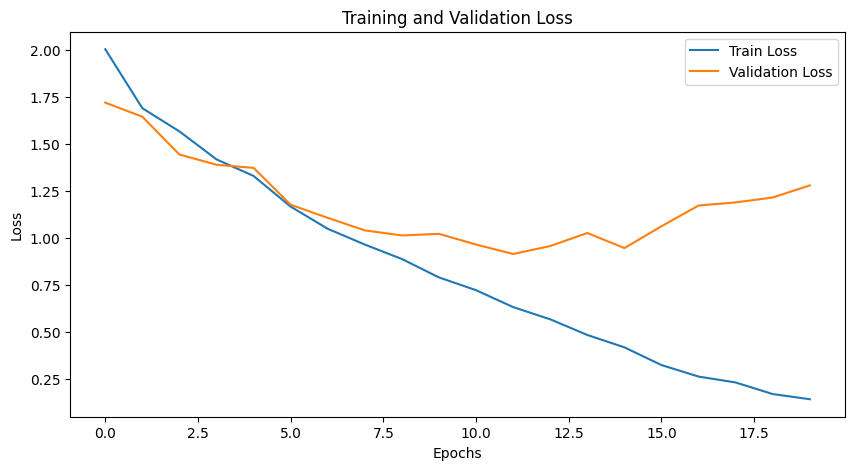

In [ ]:
# Set hyperparameters
learning_rate = 0.0002
train_batch_size = 32
eval_batch_size = 32
num_epochs = 20  # Train for 20 epochs

# DataLoaders for smaller datasets with new batch size
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNNClassifier(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning rate scheduler (linear decay)
def linear_schedule(epoch):
    return 1 - (epoch / num_epochs)

scheduler = LambdaLR(optimizer, lr_lambda=linear_schedule)

# Training loop
train_losses, val_losses = [], []
best_val_loss = float('inf')

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Training phase
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(train_loss)
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

    # Update learning rate
    scheduler.step()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_loader.dataset)
    val_acc = correct / total
    val_losses.append(val_loss)
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print("Saved Best Model!")

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


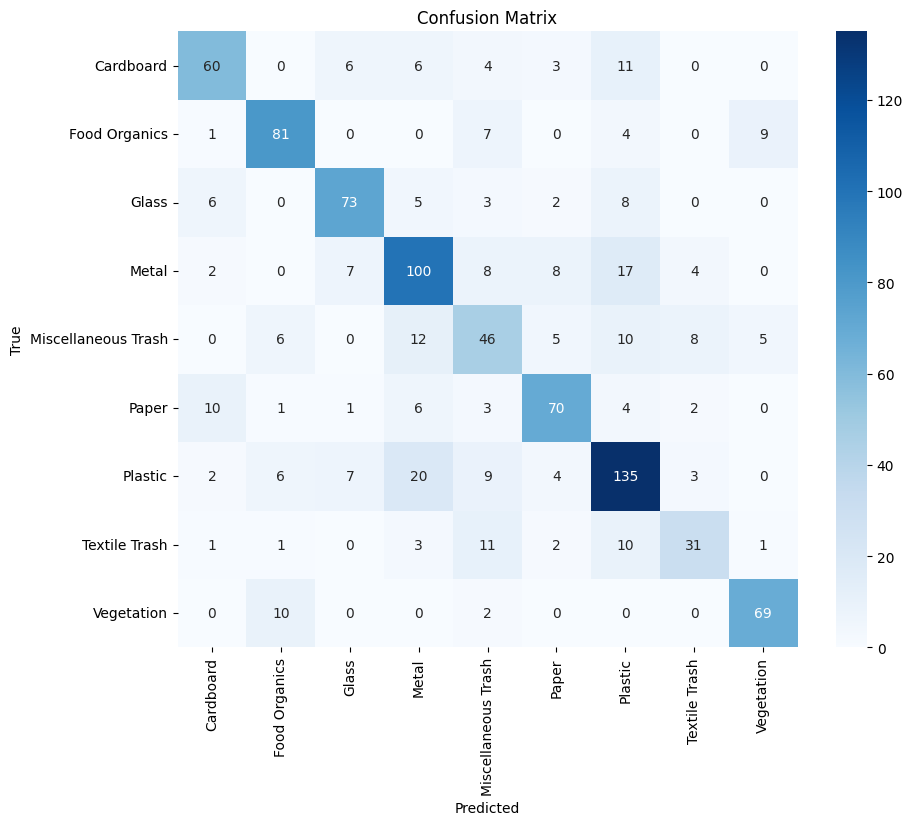

Classification Report:
                     precision    recall  f1-score   support

          Cardboard       0.73      0.67      0.70        90
      Food Organics       0.77      0.79      0.78       102
              Glass       0.78      0.75      0.76        97
              Metal       0.66      0.68      0.67       146
Miscellaneous Trash       0.49      0.50      0.50        92
              Paper       0.74      0.72      0.73        97
            Plastic       0.68      0.73      0.70       186
      Textile Trash       0.65      0.52      0.57        60
         Vegetation       0.82      0.85      0.84        81

           accuracy                           0.70       951
          macro avg       0.70      0.69      0.70       951
       weighted avg       0.70      0.70      0.70       951

Train Accuracy: 97.76%
Test Accuracy: 69.93%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Function to evaluate the model
def evaluate_model(model, data_loader):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = outputs.max(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels

# Evaluate on training dataset
train_preds, train_labels = evaluate_model(model, train_loader)
train_accuracy = accuracy_score(train_labels, train_preds)

# Evaluate on testing dataset
test_preds, test_labels = evaluate_model(model, test_loader)
test_accuracy = accuracy_score(test_labels, test_preds)

# Compute confusion matrix for the testing dataset
conf_matrix = confusion_matrix(test_labels, test_preds)

# Display confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1-score
report = classification_report(test_labels, test_preds, target_names=full_dataset.classes)
print("Classification Report:")
print(report)

# Display train/test accuracy
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Hyperparameter Tuning


Training with learning rate: 0.0001
Epoch 1/10 | Train Loss: 2.1839 | Validation Loss: 2.1920
Epoch 2/10 | Train Loss: 2.1651 | Validation Loss: 2.1791
Epoch 3/10 | Train Loss: 2.1611 | Validation Loss: 2.1740
Epoch 4/10 | Train Loss: 2.1447 | Validation Loss: 2.1141
Epoch 5/10 | Train Loss: 2.0830 | Validation Loss: 2.0528
Epoch 6/10 | Train Loss: 2.0092 | Validation Loss: 2.0341
Epoch 7/10 | Train Loss: 1.9691 | Validation Loss: 1.8294
Epoch 8/10 | Train Loss: 1.7943 | Validation Loss: 1.7828
Epoch 9/10 | Train Loss: 1.6586 | Validation Loss: 1.6580
Epoch 10/10 | Train Loss: 1.7408 | Validation Loss: 1.7639

Training with learning rate: 0.001
Epoch 1/10 | Train Loss: 2.9386 | Validation Loss: 2.2024
Epoch 2/10 | Train Loss: 2.1717 | Validation Loss: 2.1884
Epoch 3/10 | Train Loss: 2.1476 | Validation Loss: 2.1220
Epoch 4/10 | Train Loss: 2.1259 | Validation Loss: 2.1831
Epoch 5/10 | Train Loss: 2.1814 | Validation Loss: 2.1862
Epoch 6/10 | Train Loss: 2.1690 | Validation Loss: 2.181

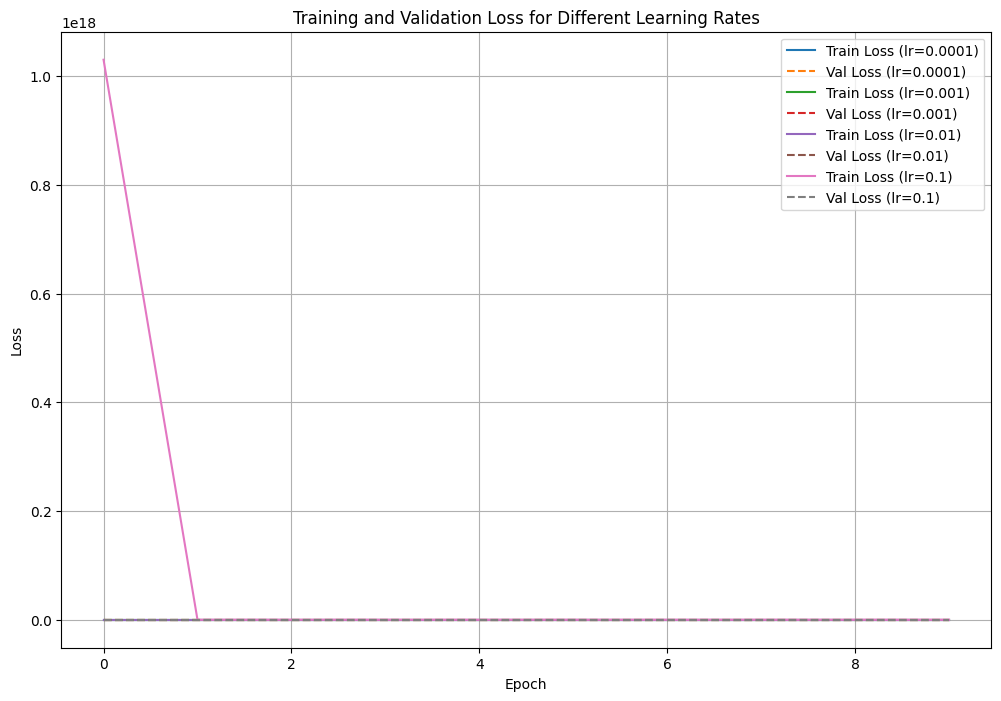

In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import Subset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# Function to train the model for a single learning rate
def train_model_with_lr(lr, train_loader, val_loader, num_epochs=10):
    model = CNNClassifier(num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        # Print details for each epoch
        print(f"Epoch {epoch + 1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | "
              f"Validation Loss: {val_loss:.4f}")

    return train_losses, val_losses

# Define learning rates to test
learning_rates = [0.0001, 0.001, 0.01, 0.1]
num_epochs = 10

# Define the split lengths
train_len = int(len(train_dataset) * 0.15)
val_len = int(len(val_dataset) * 0.15)
train_subset_len = len(train_dataset) - train_len
val_subset_len = len(val_dataset) - val_len

# Split the datasets
train_subset, _ = random_split(train_dataset, [train_len, train_subset_len])
val_subset, _ = random_split(val_dataset, [val_len, val_subset_len])

# Create DataLoaders
train_loader_hf = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader_hf = DataLoader(val_subset, batch_size=32, shuffle=False)

# Dictionary to store results
results = {}

# Train and record results for each learning rate
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    train_losses, val_losses = train_model_with_lr(lr, train_loader_hf, val_loader_hf, num_epochs)
    results[lr] = (train_losses, val_losses)

# Plot the results
plt.figure(figsize=(12, 8))
for lr, (train_losses, val_losses) in results.items():
    plt.plot(range(num_epochs), train_losses, label=f'Train Loss (lr={lr})')
    plt.plot(range(num_epochs), val_losses, label=f'Val Loss (lr={lr})', linestyle='dashed')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid()
plt.show()


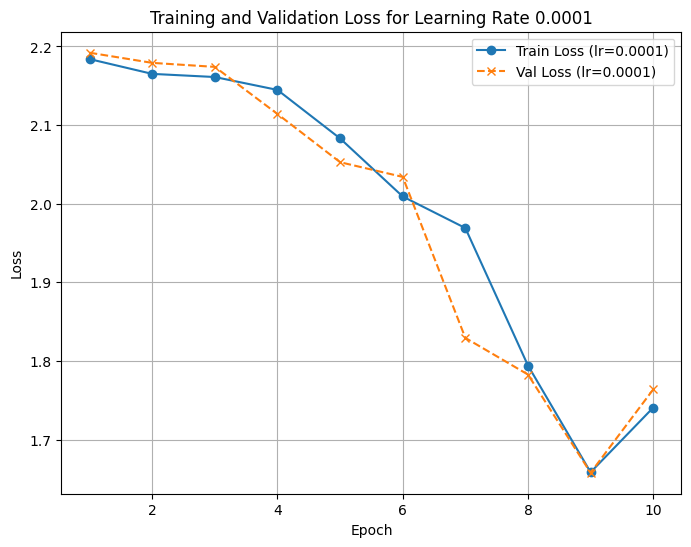

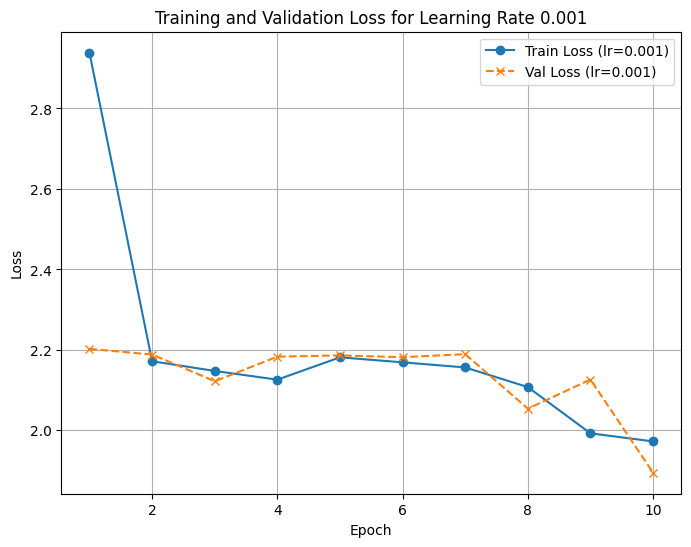

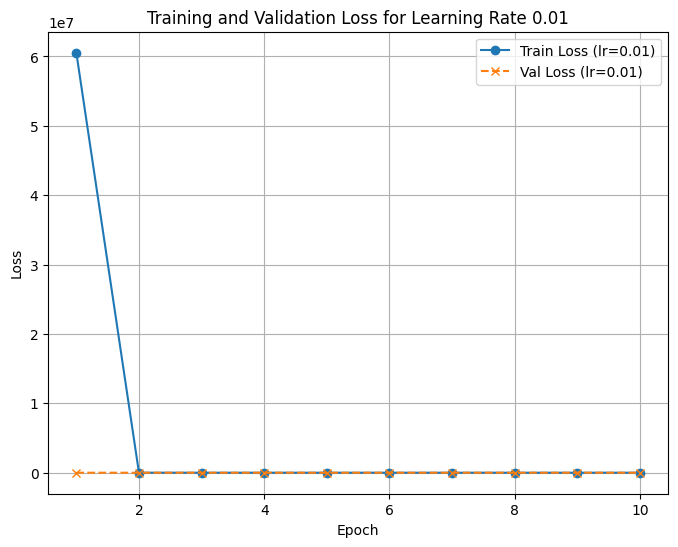

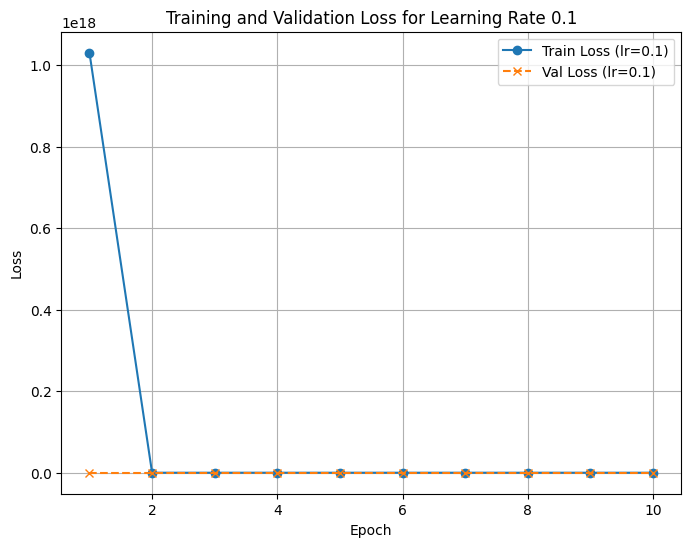

In [ ]:
# Data from training results
learning_rates = [0.0001, 0.001, 0.01, 0.1]

results = {
    0.0001: {
        "train_loss": [2.1839, 2.1651, 2.1611, 2.1447, 2.0830, 2.0092, 1.9691, 1.7943, 1.6586, 1.7408],
        "val_loss": [2.1920, 2.1791, 2.1740, 2.1141, 2.0528, 2.0341, 1.8294, 1.7828, 1.6580, 1.7639]
    },
    0.001: {
        "train_loss": [2.9386, 2.1717, 2.1476, 2.1259, 2.1814, 2.1690, 2.1563, 2.1074, 1.9925, 1.9724],
        "val_loss": [2.2024, 2.1884, 2.1220, 2.1831, 2.1862, 2.1818, 2.1893, 2.0539, 2.1262, 1.8946]
    },
    0.01: {
        "train_loss": [60542348.7313, 3047.3944, 94.4266, 2.1699, 2.1841, 2.1693, 2.1829, 2.1608, 2.1673, 2.1570],
        "val_loss": [1542.4889, 263.8122, 2.1851, 2.2026, 2.1777, 2.1768, 2.1945, 2.1766, 2.1699, 2.1724]
    },
    0.1: {
        "train_loss": [1030331708626557184.0000, 224971859.7143, 38745467.0000, 3556465.2812, 15257.2270, 2.5151, 2.2401, 2.1955, 2.1682, 2.1605],
        "val_loss": [94975296.0000, 59400260.0000, 4356837.2500, 116592.6391, 2.8330, 2.3032, 2.1855, 2.1939, 2.1921, 2.1689]
    }
}

# Plotting the data
for lr in learning_rates:
    train_loss = results[lr]["train_loss"]
    val_loss = results[lr]["val_loss"]

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), train_loss, label=f'Train Loss (lr={lr})', marker='o')
    plt.plot(range(1, 11), val_loss, label=f'Val Loss (lr={lr})', linestyle='--', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss for Learning Rate {lr}')
    plt.legend()
    plt.grid()
    plt.show()

Transfer Learning

AlexNet

Epoch 1/20


100%|██████████| 90/90 [00:19<00:00,  4.67it/s]


Train Loss: 1.3196, Validation Loss: 0.8498
Best model saved with Validation Loss: 0.8498
Epoch 2/20


100%|██████████| 90/90 [00:19<00:00,  4.71it/s]


Train Loss: 0.7601, Validation Loss: 0.6810
Best model saved with Validation Loss: 0.6810
Epoch 3/20


100%|██████████| 90/90 [00:24<00:00,  3.75it/s]


Train Loss: 0.5320, Validation Loss: 0.6226
Best model saved with Validation Loss: 0.6226
Epoch 4/20


100%|██████████| 90/90 [00:19<00:00,  4.55it/s]


Train Loss: 0.4291, Validation Loss: 0.5833
Best model saved with Validation Loss: 0.5833
Epoch 5/20


100%|██████████| 90/90 [00:19<00:00,  4.57it/s]


Train Loss: 0.3569, Validation Loss: 0.5958
Epoch 6/20


100%|██████████| 90/90 [00:23<00:00,  3.88it/s]


Train Loss: 0.2628, Validation Loss: 0.5568
Best model saved with Validation Loss: 0.5568
Epoch 7/20


100%|██████████| 90/90 [00:19<00:00,  4.61it/s]


Train Loss: 0.2522, Validation Loss: 0.5415
Best model saved with Validation Loss: 0.5415
Epoch 8/20


100%|██████████| 90/90 [00:19<00:00,  4.71it/s]


Train Loss: 0.2296, Validation Loss: 0.5441
Epoch 9/20


100%|██████████| 90/90 [00:23<00:00,  3.90it/s]


Train Loss: 0.2230, Validation Loss: 0.5226
Best model saved with Validation Loss: 0.5226
Epoch 10/20


100%|██████████| 90/90 [00:21<00:00,  4.28it/s]


Train Loss: 0.1912, Validation Loss: 0.5501
Epoch 11/20


100%|██████████| 90/90 [00:19<00:00,  4.66it/s]


Train Loss: 0.1637, Validation Loss: 0.5526
Epoch 12/20


100%|██████████| 90/90 [00:19<00:00,  4.70it/s]


Train Loss: 0.1632, Validation Loss: 0.5555
Epoch 13/20


100%|██████████| 90/90 [00:19<00:00,  4.70it/s]


Train Loss: 0.1498, Validation Loss: 0.5319
Epoch 14/20


100%|██████████| 90/90 [00:19<00:00,  4.73it/s]


Train Loss: 0.1495, Validation Loss: 0.5604
Epoch 15/20


100%|██████████| 90/90 [00:19<00:00,  4.62it/s]


Train Loss: 0.1230, Validation Loss: 0.5560
Epoch 16/20


100%|██████████| 90/90 [00:19<00:00,  4.65it/s]


Train Loss: 0.1246, Validation Loss: 0.5743
Epoch 17/20


100%|██████████| 90/90 [00:19<00:00,  4.66it/s]


Train Loss: 0.1018, Validation Loss: 0.5624
Epoch 18/20


100%|██████████| 90/90 [00:19<00:00,  4.71it/s]


Train Loss: 0.1290, Validation Loss: 0.5880
Epoch 19/20


100%|██████████| 90/90 [00:18<00:00,  4.74it/s]


Train Loss: 0.1102, Validation Loss: 0.6149
Epoch 20/20


100%|██████████| 90/90 [00:18<00:00,  4.78it/s]


Train Loss: 0.1108, Validation Loss: 0.5765


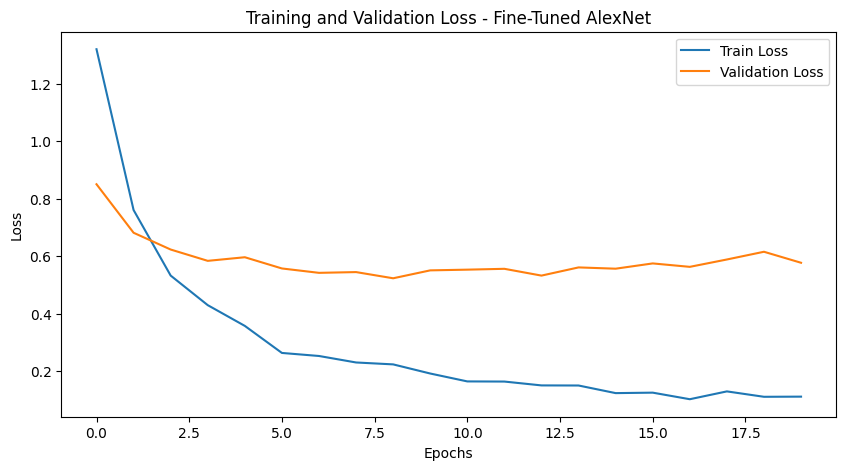

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load the pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)

# Freeze the encoder (feature extractor) layers
for param in alexnet.features.parameters():
    param.requires_grad = False

# Customize the classification head
num_classes = len(full_dataset.classes)  # Replace with the number of classes in your dataset
alexnet.classifier = nn.Sequential(
    nn.Dropout(p=0.6),  # Increased dropout for stronger regularization
    nn.Linear(256 * 6 * 6, 2048),  # Reduced layer size to 2048
    nn.BatchNorm1d(2048),  # Batch normalization for regularization and stability
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.6),
    nn.Linear(2048, 1024),  # Reduced intermediate layer size
    nn.BatchNorm1d(1024),  # Batch normalization
    nn.ReLU(inplace=True),
    nn.Linear(1024, num_classes)  # Final layer remains as it is
)

# Move model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alexnet = alexnet.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.classifier.parameters(), lr=0.0002)

# Training loop with best model saving
num_epochs = 20
train_losses, val_losses = [], []
best_val_loss = float('inf')  # Initialize the best validation loss to infinity
best_model_path = 'alexnet_best_finetuned.pth'

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Training phase
    alexnet.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    alexnet.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save the best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(alexnet.state_dict(), best_model_path)
        print(f"Best model saved with Validation Loss: {best_val_loss:.4f}")

# Plot training and validation losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Fine-Tuned AlexNet')
plt.legend()
plt.show()


Eval

<ipython-input-31-6a4c68655e5d>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  alexnet.load_state_dict(torch.load(best_model_path))


Test Accuracy: 0.8149

Classification Report:
                     precision    recall  f1-score   support

          Cardboard       0.82      0.78      0.80        90
      Food Organics       0.85      0.92      0.88       102
              Glass       0.92      0.84      0.88        97
              Metal       0.73      0.84      0.78       146
Miscellaneous Trash       0.78      0.67      0.73        92
              Paper       0.85      0.78      0.82        97
            Plastic       0.81      0.76      0.78       186
      Textile Trash       0.73      0.87      0.79        60
         Vegetation       0.90      0.95      0.92        81

           accuracy                           0.81       951
          macro avg       0.82      0.82      0.82       951
       weighted avg       0.82      0.81      0.81       951



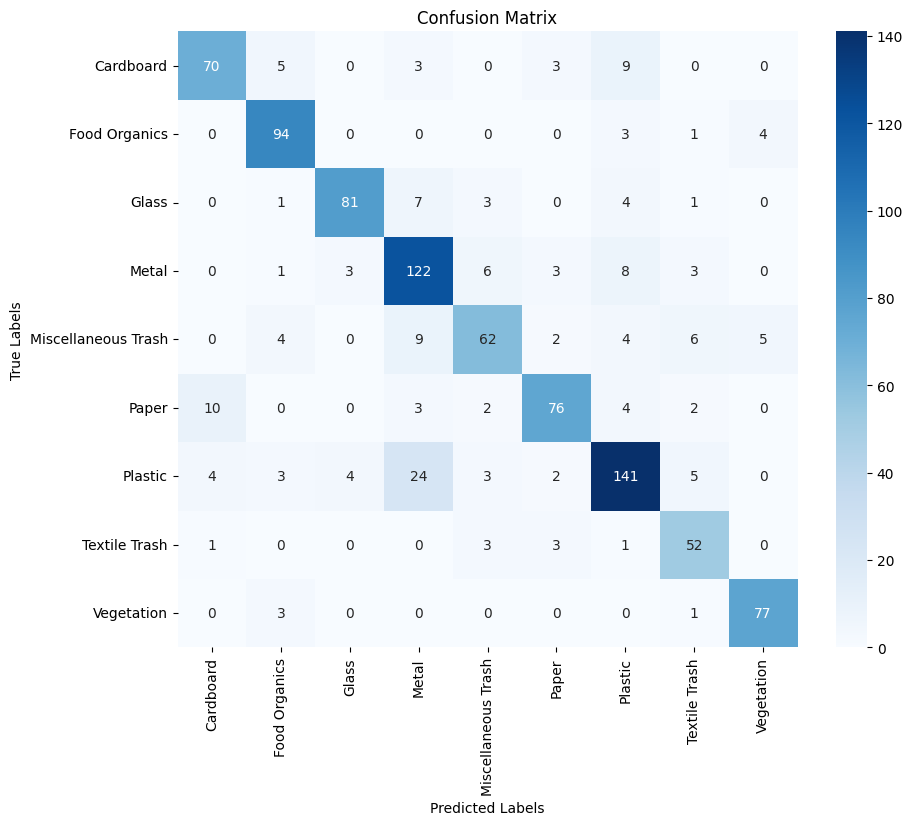

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

best_model_path = 'alexnet_best_finetuned.pth'
alexnet.load_state_dict(torch.load(best_model_path))

# Move the model to the appropriate device
alexnet = alexnet.to(device)

# Set the model to evaluation mode
alexnet.eval()

# Initialize variables to calculate accuracy
all_preds = []
all_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:  # Replace `test_loader` with your DataLoader for the test set
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = alexnet(inputs)

        # Get predictions
        _, preds = torch.max(outputs, 1)

        # Store predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate a classification report
class_report = classification_report(all_labels, all_preds, target_names=full_dataset.classes)
print("\nClassification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


VGGNet

Epoch 1/20


100%|██████████| 90/90 [00:39<00:00,  2.27it/s]


Train Loss: 1.1295, Validation Loss: 0.6543
Best model saved with Validation Loss: 0.6543
Epoch 2/20


100%|██████████| 90/90 [00:32<00:00,  2.74it/s]


Train Loss: 0.4681, Validation Loss: 0.5056
Best model saved with Validation Loss: 0.5056
Epoch 3/20


100%|██████████| 90/90 [00:35<00:00,  2.55it/s]


Train Loss: 0.2639, Validation Loss: 0.4932
Best model saved with Validation Loss: 0.4932
Epoch 4/20


100%|██████████| 90/90 [00:33<00:00,  2.70it/s]


Train Loss: 0.1713, Validation Loss: 0.4580
Best model saved with Validation Loss: 0.4580
Epoch 5/20


100%|██████████| 90/90 [00:34<00:00,  2.62it/s]


Train Loss: 0.1270, Validation Loss: 0.4873
Epoch 6/20


100%|██████████| 90/90 [00:33<00:00,  2.70it/s]


Train Loss: 0.1218, Validation Loss: 0.4946
Epoch 7/20


100%|██████████| 90/90 [00:33<00:00,  2.68it/s]


Train Loss: 0.0902, Validation Loss: 0.5387
Epoch 8/20


100%|██████████| 90/90 [00:33<00:00,  2.71it/s]


Train Loss: 0.0940, Validation Loss: 0.4791
Epoch 9/20


100%|██████████| 90/90 [00:33<00:00,  2.66it/s]


Train Loss: 0.0797, Validation Loss: 0.4905
Epoch 10/20


100%|██████████| 90/90 [00:33<00:00,  2.71it/s]


Train Loss: 0.0677, Validation Loss: 0.5038
Epoch 11/20


100%|██████████| 90/90 [00:33<00:00,  2.65it/s]


Train Loss: 0.0628, Validation Loss: 0.5040
Epoch 12/20


100%|██████████| 90/90 [00:33<00:00,  2.71it/s]


Train Loss: 0.0692, Validation Loss: 0.5474
Epoch 13/20


100%|██████████| 90/90 [00:33<00:00,  2.65it/s]


Train Loss: 0.0567, Validation Loss: 0.5328
Epoch 14/20


100%|██████████| 90/90 [00:33<00:00,  2.65it/s]


Train Loss: 0.0585, Validation Loss: 0.5263
Epoch 15/20


100%|██████████| 90/90 [00:33<00:00,  2.69it/s]


Train Loss: 0.0540, Validation Loss: 0.5335
Epoch 16/20


100%|██████████| 90/90 [00:34<00:00,  2.60it/s]


Train Loss: 0.0547, Validation Loss: 0.5490
Epoch 17/20


100%|██████████| 90/90 [00:33<00:00,  2.71it/s]


Train Loss: 0.0605, Validation Loss: 0.5154
Epoch 18/20


100%|██████████| 90/90 [00:33<00:00,  2.66it/s]


Train Loss: 0.0511, Validation Loss: 0.5366
Epoch 19/20


100%|██████████| 90/90 [00:33<00:00,  2.71it/s]


Train Loss: 0.0525, Validation Loss: 0.5577
Epoch 20/20


100%|██████████| 90/90 [00:34<00:00,  2.65it/s]


Train Loss: 0.0554, Validation Loss: 0.5484


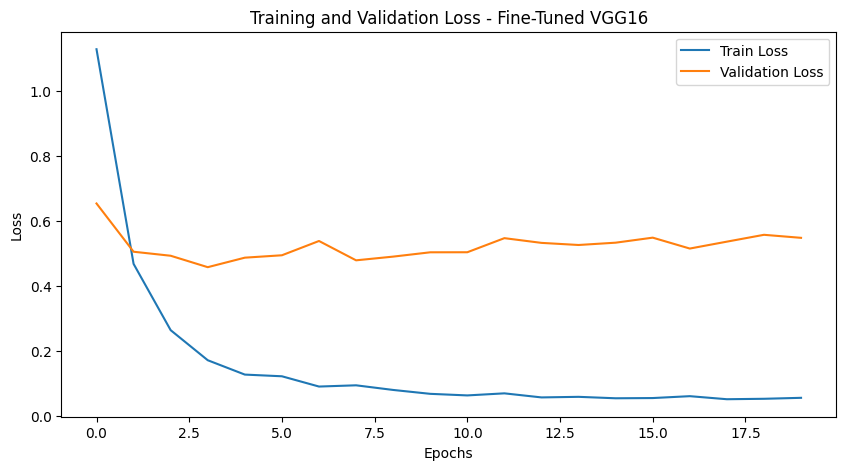

In [37]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load the pre-trained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Freeze the encoder (feature extractor) layers
for param in vgg16.features.parameters():
    param.requires_grad = False

# Calculate the correct input size dynamically
dummy_input = torch.zeros(1, 3, 224, 224)  # Adjust size to match your input images
dummy_features = vgg16.features(dummy_input).view(1, -1)
input_features = dummy_features.size(1)  # This gives 25088 for default 224x224 input size

# Customize the classification head
num_classes = len(full_dataset.classes)  # Replace with the number of classes in your dataset
vgg16.classifier = nn.Sequential(
    nn.Dropout(p=0.6),  # Increased dropout for stronger regularization
    nn.Linear(input_features, 2048),  # Use calculated input size
    nn.BatchNorm1d(2048),  # Batch normalization for regularization and stability
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.6),
    nn.Linear(2048, 1024),  # Reduced intermediate layer size
    nn.BatchNorm1d(1024),  # Batch normalization
    nn.ReLU(inplace=True),
    nn.Linear(1024, num_classes)  # Final layer remains as it is
)

# Move model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16 = vgg16.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr=0.0002)

# Training loop with best model saving
num_epochs = 20
train_losses, val_losses = [], []
best_val_loss = float('inf')  # Initialize the best validation loss to infinity
best_model_path = 'vgg16_best_finetuned.pth'

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Training phase
    vgg16.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    vgg16.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg16(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save the best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(vgg16.state_dict(), best_model_path)
        print(f"Best model saved with Validation Loss: {best_val_loss:.4f}")

# Plot training and validation losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - Fine-Tuned VGG16')
plt.legend()
plt.show()


<ipython-input-38-5d29255069b4>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg16.load_state_dict(torch.load(best_model_path))


Test Accuracy: 0.8328

Classification Report:
                     precision    recall  f1-score   support

          Cardboard       0.83      0.80      0.81        90
      Food Organics       0.88      0.94      0.91       102
              Glass       0.84      0.87      0.85        97
              Metal       0.83      0.84      0.83       146
Miscellaneous Trash       0.72      0.64      0.68        92
              Paper       0.88      0.79      0.83        97
            Plastic       0.82      0.85      0.83       186
      Textile Trash       0.80      0.73      0.77        60
         Vegetation       0.89      0.99      0.94        81

           accuracy                           0.83       951
          macro avg       0.83      0.83      0.83       951
       weighted avg       0.83      0.83      0.83       951



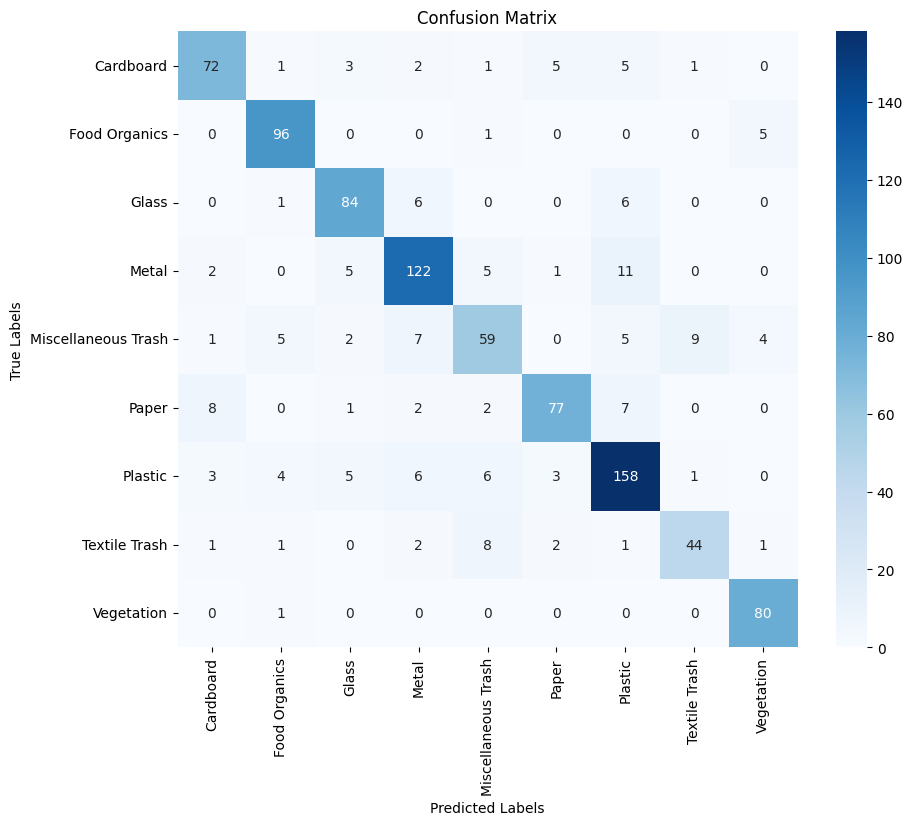

In [38]:


# Load the saved best model weights
best_model_path = 'vgg16_best_finetuned.pth'
vgg16.load_state_dict(torch.load(best_model_path))
vgg16 = vgg16.to(device)

# Set the model to evaluation mode
vgg16.eval()

# Initialize variables to calculate accuracy
all_preds = []
all_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:  # Replace `test_loader` with your DataLoader for the test set
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = vgg16(inputs)

        # Get predictions
        _, preds = torch.max(outputs, 1)

        # Store predictions and labels
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate a classification report
class_report = classification_report(all_labels, all_preds, target_names=full_dataset.classes)
print("\nClassification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
